<a href="https://colab.research.google.com/github/rlmaxon/Telecom-Churn-Kaggle/blob/main/telcom_chrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#model training script for the Kaggle competition "Telecom Churn Case Study Hackathon"  This simple model got .94363 (13th, oldvw) on the leader board.  https://www.kaggle.com/c/telecom-churn-case-study-hackathon-gc1/overview


In [9]:
#dataframes, numbers
import pandas as pd
import numpy as np

#Visuals (didn't do much, but its habit to import)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.datasets import make_classification



#helps visualize big dataframes on the screen, meaning i can see all rows without pandas concatinating. 
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [ ]:
# map the google colab to the google drive where the data is stored.
from google.colab import drive
drive.mount("/content/drive")


In [36]:
#Read the csv data in a dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

In [28]:
df.shape

(30000, 171)

In [37]:
#simple encoding of the date features 
df['last_date_of_month_6'] = pd.to_datetime(df['last_date_of_month_6']).dt.strftime("%d%m%Y")
df['last_date_of_month_7'] = pd.to_datetime(df['last_date_of_month_7']).dt.strftime("%m%d%Y")
df['last_date_of_month_8'] = pd.to_datetime(df['last_date_of_month_8']).dt.strftime("%m%d%Y")
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6']).dt.strftime("%m%d%Y")
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7']).dt.strftime("%m%d%Y")
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8']).dt.strftime("%m%d%Y")

In [13]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,30062014,07312014,08312014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,06212014,07262014,08242014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,30062014,07312014,08312014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,06192014,07162014,08242014,250,0,0,NaN,NaN,NaN,NaN,NaN,Na

In [38]:
#remove columns with lot of missing values, there were 30 features with 50K+ missing values
zero=['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7','date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']
for z in range(len(zero)):
    df.drop(zero[z], axis = 1, inplace=True)

In [ ]:
df.head(25)

In [ ]:
#remove with less than .5 correlation  (THis was not used with the test data, as the competition required all rows)
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] >.5)]

df.drop(to_drop, axis=1, inplace=True)
print(to_drop)

In [ ]:
df.head()

In [39]:
#the model can't deal with nan, but since the submission requires all 30K rows they can't just be dropped.
df = df.replace(np.nan, 0)

In [47]:
#check no missing values
df.isna().sum()

id                      False
circle_id               False
loc_og_t2o_mou          False
std_og_t2o_mou          False
loc_ic_t2o_mou          False
last_date_of_month_6    False
last_date_of_month_7    False
last_date_of_month_8    False
arpu_6                  False
arpu_7                  False
arpu_8                  False
onnet_mou_6             False
onnet_mou_7             False
onnet_mou_8             False
offnet_mou_6            False
offnet_mou_7            False
offnet_mou_8            False
roam_ic_mou_6           False
roam_ic_mou_7           False
roam_ic_mou_8           False
roam_og_mou_6           False
roam_og_mou_7           False
roam_og_mou_8           False
loc_og_t2t_mou_6        False
loc_og_t2t_mou_7        False
loc_og_t2t_mou_8        False
loc_og_t2m_mou_6        False
loc_og_t2m_mou_7        False
loc_og_t2m_mou_8        False
loc_og_t2f_mou_6        False
loc_og_t2f_mou_7        False
loc_og_t2f_mou_8        False
loc_og_t2c_mou_6        False
loc_og_t2c

(69999, 142)

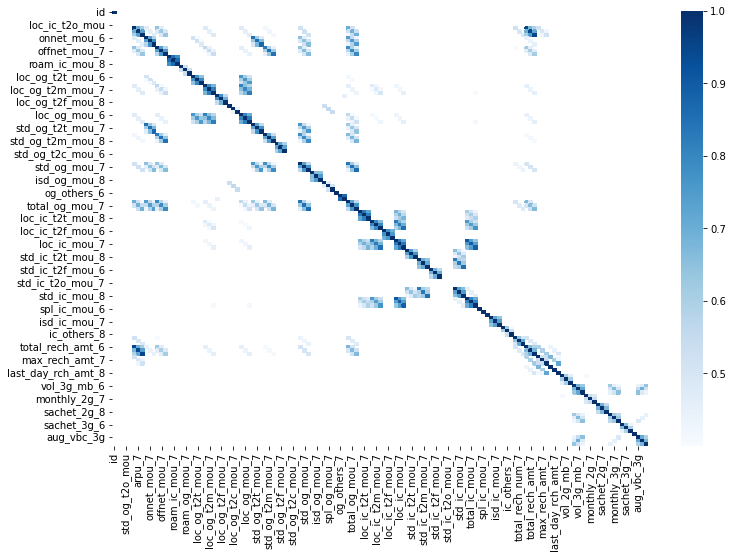

In [49]:
#drop all features with correlation less than 40%.  I explored data with this but didnt use.
# corr = df.corr()
# above = corr[corr>=.4]
# plt.figure(figsize=(12,8))
# sns.heatmap(above, cmap="Blues")

In [21]:
#create df for independent features
X= df.iloc[:, :-1].values

In [50]:
#create df for dependent or predictor features 
y = df.iloc[:, -1].values

In [23]:
#train, test, split, 70% train, 30% test.  This isn't necessary since Kaggle provided test file, but i only downloaded the train file when i started.  The test file should have been downloaded and used here.
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3)


In [25]:
# random forest model.  94,68% accuracy
forest = RandomForestClassifier(n_estimators=50,  max_depth=9, criterion='entropy', min_samples_split = 6,
                                 min_samples_leaf=1,random_state =57)
forest.fit(X_train, y_train)

forest_accuracy = cross_val_score(forest, X_train, y_train,  cv = 20).mean()

print('Model: Random Forest Accuracy: ', forest_accuracy)
     


forest.score(X_train, y_train)
acc_random_forest = round(forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

Model: Random Forest Accuracy:  0.9410000000000001
94.68


In [41]:
# run the model on the test file.  THis also puts the results into a series so it can be concat witht the ID below.
Y_prediction = pd.Series(forest.predict(test), name="churn_probability")


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [42]:
#This creatds a file combine the id from the dataframe.  THe reset index is because the test file skips rows, it lines the index between the ID and the prediction, so they can be properly concat.
ID = df["id"]
ID.reset_index(drop=True, inplace=True)
results = pd.concat([ID,Y_prediction], axis=1)

In [ ]:
#check make sure we dont have any missing values
results.isna().sum()

In [ ]:
#check make sure we have 30K rows.
results.shape

In [43]:
#Kaggle expects each variable of the results to be an 'Int32'
results['id'] = results['id'].astype('int32')

In [44]:
#Kaggle expects each variable of the results to be an 'Int32'
results['churn_probability'] = results['churn_probability'].astype('int32')

In [ ]:
#write the results to csv for submission to kaggle.
results.to_csv('/content/drive/My Drive/Colab Notebooks/churn.csv',index = False)
